In [49]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RepeatedKFold, KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
df_drug_response = pd.read_csv('For_FilnalReport.csv',index_col=0)
df_drug_response

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
LC1SQSF_LUNG,5.286142,6.624393,4.061776,5.305971,8.147815,4.422906,5.430954,0.084064,3.460743,8.357596,3.422233,5.675534,2.989139,4.872336,5.839204,5.729553,1.070389,4.265287,3.809414,4.180307,6.215096,1.298658,3.956057,5.010780,5.714520,4.415488,6.265662,4.785027,5.672991,6.796883,6.132782,5.857981,3.580145,7.051590,4.962549,3.305971,4.105175,8.923595,4.665052,5.047015,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,12.743
NCIH1395_LUNG,4.886062,4.581954,3.297191,4.504620,6.460906,4.363872,3.144046,0.678072,2.784504,1.475085,1.028569,4.077243,2.341986,2.954196,4.161081,4.200065,0.310340,5.867402,1.981853,3.044394,5.535120,1.937344,2.173127,3.918386,4.076388,3.713696,4.863443,3.051372,4.350497,5.312883,4.869871,4.925050,3.936402,4.956986,3.944858,3.381283,3.182692,8.489045,4.708739,3.135863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.083
LC1F_LUNG,5.253611,6.014132,4.518535,5.724923,8.394763,4.205549,5.435962,0.014355,3.894333,5.409391,1.220330,5.523876,2.746313,4.709842,5.834661,5.233428,0.565597,5.596935,4.019702,4.202418,6.033423,0.464668,3.976364,5.495375,4.463361,4.645010,5.563463,4.103498,5.726014,5.980939,6.210038,5.723832,3.187451,6.316508,4.533563,4.388190,4.114367,9.325508,4.250962,4.127633,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN
ABC1_LUNG,5.979339,4.698218,4.212569,4.767655,7.682995,4.267536,4.326250,0.070389,3.664483,1.454176,0.176323,5.810186,2.678072,3.701549,5.978882,6.427271,0.014355,7.045596,3.787641,4.227279,4.984589,1.157044,4.232661,4.591560,8.196971,5.079805,5.707911,3.676944,4.956057,5.827819,4.971773,5.771886,5.817623,5.904002,3.647315,5.739848,4.046142,9.499268,4.724650,4.803744,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
LK2_LUNG,5.810957,5.151372,4.660495,6.258707,7.927304,4.107688,5.272770,0.150560,4.119356,2.584963,1.339137,6.127014,2.570463,4.858478,6.003377,5.885818,0.321928,5.303781,3.261531,4.974070,5.976364,3.257011,4.836429,3.570463,3.370164,4.173927,5.863691,3.951401,5.547820,5.704319,5.497932,5.735793,1.232661,6.098664,3.748461,3.866908,3.047887,10.291286,3.548437,4.418865,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,14.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH292_LUNG,6.120186,5.288728,3.469886,5.314697,7.517591,3.848998,4.200850,0.014355,4.077243,1.459432,5.389223,5.469886,2.244887,4.111866,5.219556,6.774524,0.176323,7.442446,3.184280,4.599913,5.850249,2.653060,3.505891,5.218006,6.340028,3.910733,5.447579,3.496974,5.166715,5.596041,4.955127,5.901832,4.047887,6.117695,4.253989,4.488001,3.811471,9.005540,3.565597,5.030336,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
NCIH23_LUNG,5.861955,5.880686,3.857981,6.084702,9.259296,3.994580,4.669594,1.575312,4.084064,10.172803,3.468583,5.736875,2.835924,4.294988,6.413459,6.377124,0.000000,4.180307,3.645010,4.272770,7.365185,1.887525,3.868884,5.022368,6.420550,4.048759,6.109152,3.206331,6.08

In [51]:
features = list(df_drug_response.columns)[:912]
df_x = df_drug_response.loc[:,features]
df_y = df_drug_response['ERLOTINIB']

In [52]:
df_x

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TFDP2_mut,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut
LC1SQSF_LUNG,5.286142,6.624393,4.061776,5.305971,8.147815,4.422906,5.430954,0.084064,3.460743,8.357596,3.422233,5.675534,2.989139,4.872336,5.839204,5.729553,1.070389,4.265287,3.809414,4.180307,6.215096,1.298658,3.956057,5.010780,5.714520,4.415488,6.265662,4.785027,5.672991,6.796883,6.132782,5.857981,3.580145,7.051590,4.962549,3.305971,4.105175,8.923595,4.665052,5.047015,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
NCIH1395_LUNG,4.886062,4.581954,3.297191,4.504620,6.460906,4.363872,3.144046,0.678072,2.784504,1.475085,1.028569,4.077243,2.341986,2.954196,4.161081,4.200065,0.310340,5.867402,1.981853,3.044394,5.535120,1.937344,2.173127,3.918386,4.076388,3.713696,4.863443,3.051372,4.350497,5.312883,4.869871,4.925050,3.936402,4.956986,3.944858,3.381283,3.182692,8.489045,4.708739,3.135863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC1F_LUNG,5.253611,6.014132,4.518535,5.724923,8.394763,4.205549,5.435962,0.014355,3.894333,5.409391,1.220330,5.523876,2.746313,4.709842,5.834661,5.233428,0.565597,5.596935,4.019702,4.202418,6.033423,0.464668,3.976364,5.495375,4.463361,4.645010,5.563463,4.103498,5.726014,5.980939,6.210038,5.723832,3.187451,6.316508,4.533563,4.388190,4.114367,9.325508,4.250962,4.127633,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ABC1_LUNG,5.979339,4.698218,4.212569,4.767655,7.682995,4.267536,4.326250,0.070389,3.664483,1.454176,0.176323,5.810186,2.678072,3.701549,5.978882,6.427271,0.014355,7.045596,3.787641,4.227279,4.984589,1.157044,4.232661,4.591560,8.196971,5.079805,5.707911,3.676944,4.956057,5.827819,4.971773,5.771886,5.817623,5.904002,3.647315,5.739848,4.046142,9.499268,4.724650,4.803744,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
LK2_LUNG,5.810957,5.151372,4.660495,6.258707,7.927304,4.107688,5.272770,0.150560,4.119356,2.584963,1.339137,6.127014,2.570463,4.858478,6.003377,5.885818,0.321928,5.303781,3.261531,4.974070,5.976364,3.257011,4.836429,3.570463,3.370164,4.173927,5.863691,3.951401,5.547820,5.704319,5.497932,5.735793,1.232661,6.098664,3.748461,3.866908,3.047887,10.291286,3.548437,4.418865,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH292_LUNG,6.120186,5.288728,3.469886,5.314697,7.517591,3.848998,4.200850,0.014355,4.077243,1.459432,5.389223,5.469886,2.244887,4.111866,5.219556,6.774524,0.176323,7.442446,3.184280,4.599913,5.850249,2.653060,3.505891,5.218006,6.340028,3.910733,5.447579,3.496974,5.166715,5.596041,4.955127,5.901832,4.047887,6.117695,4.253989,4.488001,3.811471,9.005540,3.565597,5.030336,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NCIH23_LUNG,5.861955,5.880686,3.857981,6.084702,9.259296,3.994580,4.669594,1.575312,4.084064,10.172803,3.468583,5.736875,2.835924,4.294988,6.413459,6.377124,0.000000,4.180307,3.645010,4.272770,7.365185,1.887525,3.868884,5.022368,6.420550,4.048759,6.109152,3.206331,6.086614,5.542568,5.98595

In [53]:
df_y

LC1SQSF_LUNG     12.743
NCIH1395_LUNG    14.083
LC1F_LUNG           NaN
ABC1_LUNG           NaN
LK2_LUNG         14.995
                  ...  
NCIH292_LUNG        NaN
NCIH23_LUNG      14.744
NCIH1355_LUNG    12.443
HCC515_LUNG         NaN
NCIH2405_LUNG    13.057
Name: ERLOTINIB, Length: 186, dtype: float64

In [54]:
df_drug_response.isnull()
df_remove = df_drug_response.dropna()
df_remove

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
LC1SQSF_LUNG,5.286142,6.624393,4.061776,5.305971,8.147815,4.422906,5.430954,0.084064,3.460743,8.357596,3.422233,5.675534,2.989139,4.872336,5.839204,5.729553,1.070389,4.265287,3.809414,4.180307,6.215096,1.298658,3.956057,5.010780,5.714520,4.415488,6.265662,4.785027,5.672991,6.796883,6.132782,5.857981,3.580145,7.051590,4.962549,3.305971,4.105175,8.923595,4.665052,5.047015,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,12.743
NCIH1395_LUNG,4.886062,4.581954,3.297191,4.504620,6.460906,4.363872,3.144046,0.678072,2.784504,1.475085,1.028569,4.077243,2.341986,2.954196,4.161081,4.200065,0.310340,5.867402,1.981853,3.044394,5.535120,1.937344,2.173127,3.918386,4.076388,3.713696,4.863443,3.051372,4.350497,5.312883,4.869871,4.925050,3.936402,4.956986,3.944858,3.381283,3.182692,8.489045,4.708739,3.135863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.083
LK2_LUNG,5.810957,5.151372,4.660495,6.258707,7.927304,4.107688,5.272770,0.150560,4.119356,2.584963,1.339137,6.127014,2.570463,4.858478,6.003377,5.885818,0.321928,5.303781,3.261531,4.974070,5.976364,3.257011,4.836429,3.570463,3.370164,4.173927,5.863691,3.951401,5.547820,5.704319,5.497932,5.735793,1.232661,6.098664,3.748461,3.866908,3.047887,10.291286,3.548437,4.418865,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,14.995
NCIH446_LUNG,5.717539,5.590063,3.965323,5.957682,8.637893,3.993674,4.674122,7.003152,3.768714,7.264067,3.155425,5.702658,3.310340,5.338781,6.199476,6.763146,0.124328,0.201634,4.159468,4.396434,6.606294,5.475409,4.514753,4.763412,5.143230,5.019702,6.226894,3.839960,5.753818,6.780966,6.342341,5.386811,3.493135,6.452035,0.641546,1.280956,3.021480,10.377644,3.828835,5.558268,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,13.862
LOUNH91_LUNG,6.056367,5.632850,3.979111,5.478648,8.002365,3.797013,5.080658,0.056584,3.746313,10.588340,3.559492,5.893362,2.226509,4.619413,5.591261,6.853122,0.201634,0.495695,3.629939,4.596339,6.035844,4.759688,4.136684,5.129283,5.193772,4.422906,5.828327,3.518535,6.268846,5.093391,5.742545,5.334854,2.358959,6.475085,5.311067,1.014355,4.018812,9.657086,3.659925,4.457463,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH1581_LUNG,6.151575,5.197315,3.563158,6.573647,8.016363,3.536053,4.541019,5.572283,4.146492,11.175362,2.392317,5.426936,2.835924,3.737687,6.076174,5.006298,1.646163,0.310340,3.384050,4.180307,5.624686,4.827311,4.991862,3.744161,2.794936,3.753818,6.140779,3.215679,5.727104,5.655352,5.239551,6.294988,2.715893,5.279843,0.847997,2.301588,2.994580,10.534497,4.580748,4.422906,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.593
RERFLCAD1_LUNG,6.464668,5.465974,4.401221,5.940402,8.182146,4.341274,5.375039,0.137504,4.386121,8.860466,6.077457,5.958843,3.124328,4.228819,6.159468,6.426097,0.042644,7.823240,4.550901,4.458119,5.928133,2.901108,4.748998,5.421560,5.726014,5.093391,

In [55]:
df_drug_response = df_remove
df_drug_response
df_y = df_drug_response['ERLOTINIB']
df_y

LC1SQSF_LUNG      12.743
NCIH1395_LUNG     14.083
LK2_LUNG          14.995
NCIH446_LUNG      13.862
LOUNH91_LUNG      13.145
                   ...  
NCIH1581_LUNG     12.593
RERFLCAD1_LUNG    15.282
NCIH23_LUNG       14.744
NCIH1355_LUNG     12.443
NCIH2405_LUNG     13.057
Name: ERLOTINIB, Length: 129, dtype: float64

In [56]:
df_drug_response.describe()

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,5.942274,5.479195,4.126246,5.870372,7.980950,4.036753,4.711118,0.797004,3.943458,6.385162,2.649176,5.824398,3.048792,4.429561,5.829148,6.191456,0.340365,4.378402,3.642973,4.416978,6.087759,2.882061,4.378116,4.900735,5.391304,4.425136,5.872629,3.763290,5.349530,5.784688,5.761320,5.762217,3.378635,6.208909,4.394671,3.355029,3.765542,9.814866,4.094676,4.565243,...,0.031008,0.046512,0.046512,0.015504,0.0,0.031008,0.0,0.054264,0.860465,0.031008,0.147287,0.015504,0.023256,0.007752,0.038760,0.007752,0.077519,0.0,0.038760,0.023256,0.077519,0.023256,0.015504,0.085271,0.023256,0.023256,0.054264,0.069767,0.015504,0.038760,0.147287,0.015504,0.038760,0.023256,0.139535,0.108527,0.062016,0.038760,0.031008,13.166666
std,0.583321,0.565632,0.678620,0.628721,0.777367,0.529220,0.646986,1.827019,0.496625,3.731925,1.534590,0.527837,0.586092,0.769473,0.428367,1.030560,0.507942,2.907089,0.620055,0.595927,0.544598,1.723135,0.736796,1.084145,1.350712,0.634883,0.502966,0.551748,0.579824,0.489311,0.807072,0.439210,1.531045,0.491932,1.304734,1.979501,0.548374,0.648552,0.605460,0.781465,...,0.174014,0.211411,0.211411,0.124027,0.0,0.174014,0.0,0.227420,0.347855,0.174014,0.355773,0.124027,0.151302,0.088045,0.193774,0.088045,0.268456,0.0,0.193774,0.151302,0.268456,0.151302,0.124027,0.280374,0.151302,0.151302,0.227420,0.255748,0.124027,0.193774,0.355773,0.124027,0.193774,0.151302,0.347855,0.312258,0.242124,0.193774,0.174014,2.294489
min,4.599318,3.823749,2.263034,4.368070,6.116864,2.782409,2.815575,0.000000,2.295723,1.220330,0.097611,4.077243,1.536053,2.292782,4.161081,2.976364,0.000000,0.111031,1.580145,3.044394,4.768184,0.084064,2.173127,1.316146,1.989139,1.863938,4.692650,2.286881,3.490570,4.791814,3.636915,4.682011,0.124328,4.956986,0.389567,0.356144,2.427606,7.864186,1.835924,2.272023,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.808800
25%,5.499208,5.151372,3.647315,5.477030,7.652271,3.613532,4.301588,0.014355,3.670161,2.713696,1.275007,5.492174,2.691534,3.944858,5.585864,5.505573,0.000000,0.887525,3.357552,4.038261,5.721099,1.655352,3.840967,4.277985,4.430285,4.142413,5.559492,3.410070,5.063934,5.398487,5.234961,5.484783,2.358959,5.842979,3.819668,1.361768,3.408712

In [57]:
df_drug_response.dtypes

RBM5          float64
CDC27         float64
CREBBP        float64
MED24         float64
CSDE1         float64
               ...   
ZNF638_mut      int64
ZNF750_mut      int64
ZNF814_mut      int64
ZNRF3_mut       int64
ERLOTINIB     float64
Length: 913, dtype: object

In [58]:
df_drug_response['ERLOTINIB'].value_counts().sort_index()

2.8088     1
3.9217     1
6.4318     1
7.6058     1
8.5103     1
          ..
17.0230    1
17.4920    1
18.5040    1
18.5400    1
18.6770    1
Name: ERLOTINIB, Length: 127, dtype: int64

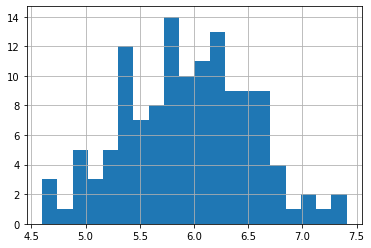

In [59]:
df_drug_response['RBM5'].hist(bins=20)

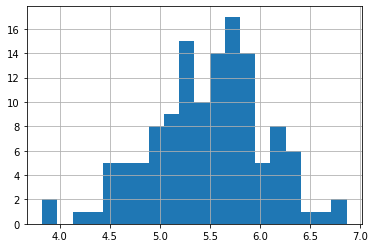

In [60]:
df_drug_response['CDC27'].hist(bins=20)

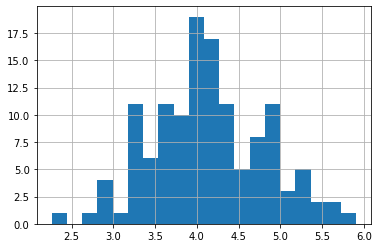

In [61]:
df_drug_response['CREBBP'].hist(bins=20)

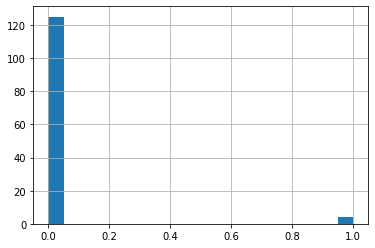

In [62]:
df_drug_response['ZNRF3_mut'].hist(bins=20)

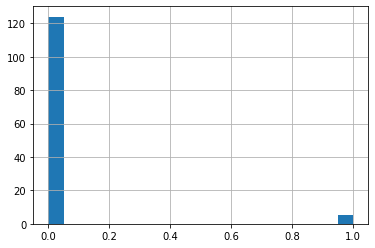

In [63]:
df_drug_response['ZNF814_mut'].hist(bins=20)

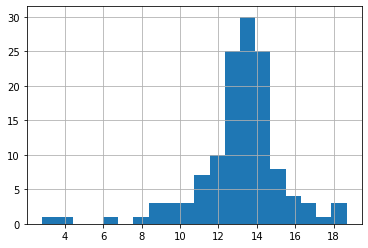

In [64]:
df_drug_response['ERLOTINIB'].hist(bins=20)

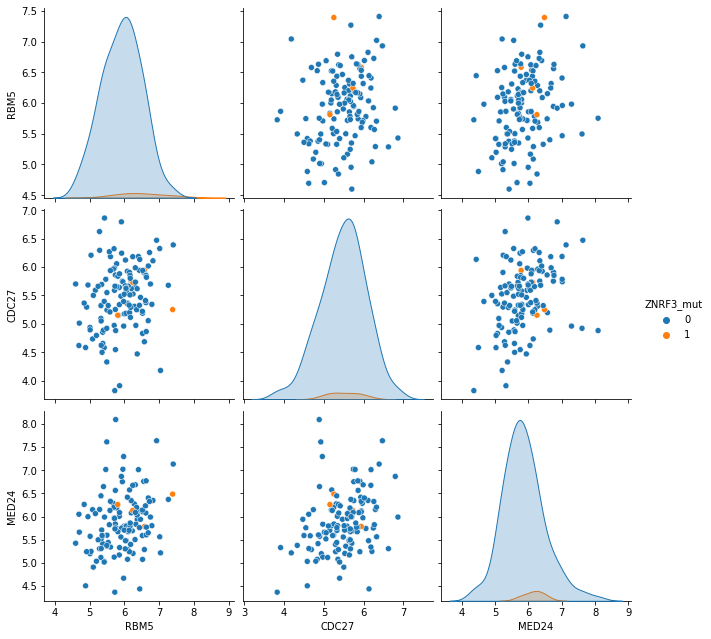

In [65]:
seed = 100
df_drug_response_sample = df_drug_response.sample(n=129, random_state=seed)
sns.pairplot(data=df_drug_response_sample, vars=['RBM5','CDC27','MED24'], hue='ZNRF3_mut', height=3)

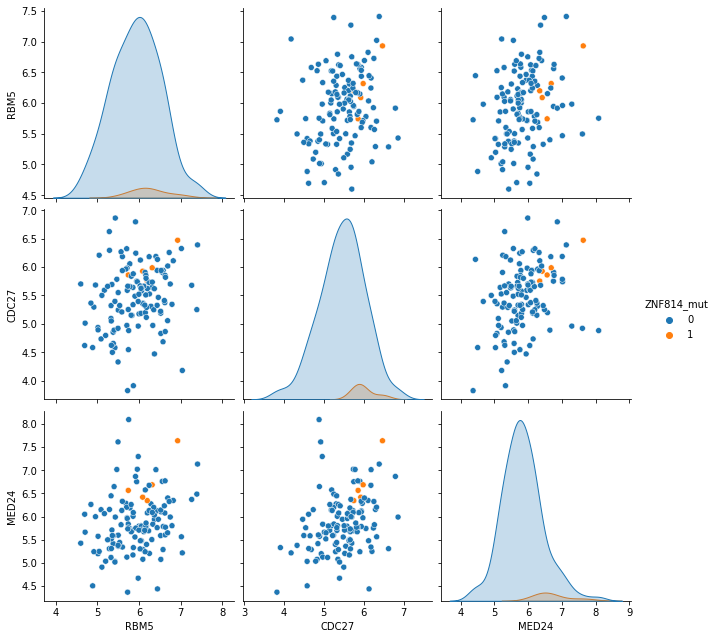

In [66]:
seed = 100
df_drug_response_sample = df_drug_response.sample(n=129, random_state=seed)
sns.pairplot(data=df_drug_response_sample, vars=['RBM5','CDC27','MED24'], hue='ZNF814_mut', height=3)

In [67]:
file = "For_FilnalReport.csv"
df_data = pd.read_csv(file,index_col=0)
df_data

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
LC1SQSF_LUNG,5.286142,6.624393,4.061776,5.305971,8.147815,4.422906,5.430954,0.084064,3.460743,8.357596,3.422233,5.675534,2.989139,4.872336,5.839204,5.729553,1.070389,4.265287,3.809414,4.180307,6.215096,1.298658,3.956057,5.010780,5.714520,4.415488,6.265662,4.785027,5.672991,6.796883,6.132782,5.857981,3.580145,7.051590,4.962549,3.305971,4.105175,8.923595,4.665052,5.047015,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,12.743
NCIH1395_LUNG,4.886062,4.581954,3.297191,4.504620,6.460906,4.363872,3.144046,0.678072,2.784504,1.475085,1.028569,4.077243,2.341986,2.954196,4.161081,4.200065,0.310340,5.867402,1.981853,3.044394,5.535120,1.937344,2.173127,3.918386,4.076388,3.713696,4.863443,3.051372,4.350497,5.312883,4.869871,4.925050,3.936402,4.956986,3.944858,3.381283,3.182692,8.489045,4.708739,3.135863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.083
LC1F_LUNG,5.253611,6.014132,4.518535,5.724923,8.394763,4.205549,5.435962,0.014355,3.894333,5.409391,1.220330,5.523876,2.746313,4.709842,5.834661,5.233428,0.565597,5.596935,4.019702,4.202418,6.033423,0.464668,3.976364,5.495375,4.463361,4.645010,5.563463,4.103498,5.726014,5.980939,6.210038,5.723832,3.187451,6.316508,4.533563,4.388190,4.114367,9.325508,4.250962,4.127633,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN
ABC1_LUNG,5.979339,4.698218,4.212569,4.767655,7.682995,4.267536,4.326250,0.070389,3.664483,1.454176,0.176323,5.810186,2.678072,3.701549,5.978882,6.427271,0.014355,7.045596,3.787641,4.227279,4.984589,1.157044,4.232661,4.591560,8.196971,5.079805,5.707911,3.676944,4.956057,5.827819,4.971773,5.771886,5.817623,5.904002,3.647315,5.739848,4.046142,9.499268,4.724650,4.803744,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
LK2_LUNG,5.810957,5.151372,4.660495,6.258707,7.927304,4.107688,5.272770,0.150560,4.119356,2.584963,1.339137,6.127014,2.570463,4.858478,6.003377,5.885818,0.321928,5.303781,3.261531,4.974070,5.976364,3.257011,4.836429,3.570463,3.370164,4.173927,5.863691,3.951401,5.547820,5.704319,5.497932,5.735793,1.232661,6.098664,3.748461,3.866908,3.047887,10.291286,3.548437,4.418865,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,14.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH292_LUNG,6.120186,5.288728,3.469886,5.314697,7.517591,3.848998,4.200850,0.014355,4.077243,1.459432,5.389223,5.469886,2.244887,4.111866,5.219556,6.774524,0.176323,7.442446,3.184280,4.599913,5.850249,2.653060,3.505891,5.218006,6.340028,3.910733,5.447579,3.496974,5.166715,5.596041,4.955127,5.901832,4.047887,6.117695,4.253989,4.488001,3.811471,9.005540,3.565597,5.030336,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
NCIH23_LUNG,5.861955,5.880686,3.857981,6.084702,9.259296,3.994580,4.669594,1.575312,4.084064,10.172803,3.468583,5.736875,2.835924,4.294988,6.413459,6.377124,0.000000,4.180307,3.645010,4.272770,7.365185,1.887525,3.868884,5.022368,6.420550,4.048759,6.109152,3.206331,6.08

In [68]:
df_data.corr()

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
RBM5,1.000000,0.202905,0.243642,0.273297,0.189858,0.306214,0.179527,0.006711,0.288952,0.127846,-0.112314,0.457089,0.448125,0.153187,0.262567,0.191016,-0.054995,-0.061525,0.311983,0.306853,0.394962,0.079197,0.423968,-0.020927,0.004339,-0.065758,0.457760,0.377601,0.181603,0.364804,0.317144,0.503557,0.005467,0.151970,-0.060484,-0.018283,0.241044,0.158693,-0.017678,0.323085,...,0.055783,-0.077614,0.136427,0.031822,0.046097,0.040285,NaN,-0.048283,0.131535,0.069733,0.052771,-0.037225,0.071936,-0.101935,0.074704,0.128226,0.001551,0.020138,-0.005156,0.149952,0.118730,0.134243,-0.006151,-0.058325,-0.043143,0.033362,-0.006192,0.126812,-0.050693,-0.102242,0.005138,0.012430,0.226364,0.170499,-0.022441,0.105009,-0.119654,0.075409,0.183542,0.155848
CDC27,0.202905,1.000000,0.302899,0.272398,0.261394,0.216967,0.541321,0.136615,0.302395,0.319125,0.096116,0.459016,0.295760,0.307187,0.364596,0.140980,-0.008401,-0.343823,0.352547,0.363684,0.345656,0.116921,0.288507,0.093998,0.048898,0.145631,0.429972,0.330238,0.397808,0.334539,0.404937,0.418156,-0.167038,0.342364,-0.065531,-0.352264,0.242909,0.204250,-0.035319,0.478027,...,0.037586,0.123185,0.126994,0.068982,0.015815,0.072724,NaN,0.112250,0.046735,0.013357,-0.000205,-0.095791,-0.080268,0.014060,0.030720,0.112356,0.042998,-0.036584,-0.012429,-0.004581,0.105054,0.088125,-0.072150,-0.070452,-0.010487,0.054534,0.011264,-0.005631,-0.165466,0.142485,0.010541,0.062609,0.076069,0.098537,-0.061629,-0.011772,-0.050898,0.101644,0.032858,0.165083
CREBBP,0.243642,0.302899,1.000000,0.206134,0.204012,0.323899,0.367946,0.009423,0.192036,0.010131,-0.046855,0.430053,0.390621,0.175392,0.191940,0.135684,-0.090348,-0.105106,0.408158,0.280541,0.214108,0.165576,0.502501,0.127023,-0.004488,0.064331,0.397419,0.365761,0.188742,0.331469,0.517001,0.156658,-0.040878,0.224260,-0.073477,-0.131921,0.079908,0.076140,-0.051615,0.237913,...,0.095770,0.102727,0.096604,0.092828,0.120633,0.096676,NaN,-0.048806,0.109941,0.109513,0.168630,-0.118464,-0.141763,-0.015724,-0.006713,0.119325,-0.049202,-0.079161,-0.009240,0.057388,0.079084,0.017698,0.059296,-0.008110,0.104596,-0.025644,0.036128,0.028911,-0.011701,0.056227,0.028372,0.150084,0.116466,0.055065,-0.038522,0.017921,-0.121958,0.096260,0.058729,0.181529
MED24,0.273297,0.272398,0.206134,1.000000,0.150954,0.241615,0.315886,0.111496,0.078455,-0.080667,-0.251473,0.333158,0.382803,0.194715,0.226917,0.007368,0.069244,-0.004949,0.337001,0.240480,0.330144,0.172062,0.416518,0.112233,-0.108275,-0.188765,0.340284,0.284919,0.071331,0.371605,0.275329,0.181199,0.018753,0.027875,-0.284544,-0.098999,0.022970,0.253530,-0.081907,0.173958,...,-0.000235,0.089521,0.109374,0.135110,-0.006177,0.139862,NaN,0.040589,0.111929,-0.006453,0.021880,-0.042040,-0.077329,0.021245,0.028629,-0.034492,-0.027512,-0.044675,0.011975,0.036705,0.027624,-0.069482,0.074239,-0.030250,-0.040543,-0.052121,-0.006450,0.053375,-0.076964,-0.006161,-0.000441,0.154209,0.063389,-0.061057,0.055696,0.000798,-0.092459,0.134000,-0.003842,0.149013
CSDE1,0.189858,0.261394,0.204012,0.150954,1.000000,0.198152,0.241911,0.124205,0.112723,-0.008700,-0.108108,0.347414,0.168422,0.159196,0.387721,0.046959,-0.090583,-0.087021,0.176436,0.297370,0.302210,0.080111,0.269390,0.085858,-0.019130,-0.059331,0.380372,0.193378,0.237873,0.205721,0.352893,0.243964,-0.061813,0.248069,-0.137749,-0.079874,0.082080,0.414851,-0.073

In [69]:
df_data.isnull()
df_remove = df_data.dropna()
df_data = df_remove
df_data

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
LC1SQSF_LUNG,5.286142,6.624393,4.061776,5.305971,8.147815,4.422906,5.430954,0.084064,3.460743,8.357596,3.422233,5.675534,2.989139,4.872336,5.839204,5.729553,1.070389,4.265287,3.809414,4.180307,6.215096,1.298658,3.956057,5.010780,5.714520,4.415488,6.265662,4.785027,5.672991,6.796883,6.132782,5.857981,3.580145,7.051590,4.962549,3.305971,4.105175,8.923595,4.665052,5.047015,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,12.743
NCIH1395_LUNG,4.886062,4.581954,3.297191,4.504620,6.460906,4.363872,3.144046,0.678072,2.784504,1.475085,1.028569,4.077243,2.341986,2.954196,4.161081,4.200065,0.310340,5.867402,1.981853,3.044394,5.535120,1.937344,2.173127,3.918386,4.076388,3.713696,4.863443,3.051372,4.350497,5.312883,4.869871,4.925050,3.936402,4.956986,3.944858,3.381283,3.182692,8.489045,4.708739,3.135863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.083
LK2_LUNG,5.810957,5.151372,4.660495,6.258707,7.927304,4.107688,5.272770,0.150560,4.119356,2.584963,1.339137,6.127014,2.570463,4.858478,6.003377,5.885818,0.321928,5.303781,3.261531,4.974070,5.976364,3.257011,4.836429,3.570463,3.370164,4.173927,5.863691,3.951401,5.547820,5.704319,5.497932,5.735793,1.232661,6.098664,3.748461,3.866908,3.047887,10.291286,3.548437,4.418865,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,14.995
NCIH446_LUNG,5.717539,5.590063,3.965323,5.957682,8.637893,3.993674,4.674122,7.003152,3.768714,7.264067,3.155425,5.702658,3.310340,5.338781,6.199476,6.763146,0.124328,0.201634,4.159468,4.396434,6.606294,5.475409,4.514753,4.763412,5.143230,5.019702,6.226894,3.839960,5.753818,6.780966,6.342341,5.386811,3.493135,6.452035,0.641546,1.280956,3.021480,10.377644,3.828835,5.558268,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,13.862
LOUNH91_LUNG,6.056367,5.632850,3.979111,5.478648,8.002365,3.797013,5.080658,0.056584,3.746313,10.588340,3.559492,5.893362,2.226509,4.619413,5.591261,6.853122,0.201634,0.495695,3.629939,4.596339,6.035844,4.759688,4.136684,5.129283,5.193772,4.422906,5.828327,3.518535,6.268846,5.093391,5.742545,5.334854,2.358959,6.475085,5.311067,1.014355,4.018812,9.657086,3.659925,4.457463,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH1581_LUNG,6.151575,5.197315,3.563158,6.573647,8.016363,3.536053,4.541019,5.572283,4.146492,11.175362,2.392317,5.426936,2.835924,3.737687,6.076174,5.006298,1.646163,0.310340,3.384050,4.180307,5.624686,4.827311,4.991862,3.744161,2.794936,3.753818,6.140779,3.215679,5.727104,5.655352,5.239551,6.294988,2.715893,5.279843,0.847997,2.301588,2.994580,10.534497,4.580748,4.422906,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.593
RERFLCAD1_LUNG,6.464668,5.465974,4.401221,5.940402,8.182146,4.341274,5.375039,0.137504,4.386121,8.860466,6.077457,5.958843,3.124328,4.228819,6.159468,6.426097,0.042644,7.823240,4.550901,4.458119,5.928133,2.901108,4.748998,5.421560,5.726014,5.093391,

X data
                   RBM5     CDC27    CREBBP  ...    DICER1      CHD8     PSMA6
LC1SQSF_LUNG   5.286142  6.624393  4.061776  ...  4.729553  5.119771  8.851124
NCIH1395_LUNG  4.886062  4.581954  3.297191  ...  3.367371  4.564378  7.133091
LK2_LUNG       5.810957  5.151372  4.660495  ...  3.174726  5.206331  8.068187
NCIH446_LUNG   5.717539  5.590063  3.965323  ...  4.368070  5.982765  8.532979
LOUNH91_LUNG   6.056367  5.632850  3.979111  ...  2.704872  4.011675  7.147408

[5 rows x 100 columns]

Y data
               ERLOTINIB
LC1SQSF_LUNG      12.743
NCIH1395_LUNG     14.083
LK2_LUNG          14.995
NCIH446_LUNG      13.862
LOUNH91_LUNG      13.145


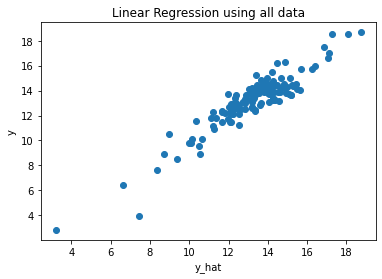

coefficients
0     2.088155
1    -0.659904
2    -0.926230
3     0.729351
4     0.114839
        ...   
95   -0.788151
96    0.144398
97   -1.873688
98   -0.286929
99    0.026907
Length: 100, dtype: float64

intercept
[29.77544605]

r2 score = 0.8516703788291601


In [70]:
data_x = df_data.iloc[:,:100]
print('X data')
print(data_x.head(5))
data_y = df_data.loc[:,['ERLOTINIB']]
print()
print('Y data')
print(data_y.head(5))

model=LinearRegression()
model.fit(data_x, data_y)
y_hat = model.predict(data_x)
y = data_y

plt.scatter(x=y_hat, y=y)
plt.xlabel('y_hat')
plt.ylabel('y')
plt.title('Linear Regression using all data')
plt.show()

model_coef = pd.Series(model.coef_.reshape(-1))
print('coefficients')
print(model_coef)
print()
print('intercept')
print(model.intercept_)
print()
print('r2 score = {}'.format(r2_score(y_hat,data_y.values)))

X data
                   RBM5     CDC27    CREBBP  ...  ZNF750_mut  ZNF814_mut  ZNRF3_mut
LC1SQSF_LUNG   5.286142  6.624393  4.061776  ...           0           0          0
NCIH1395_LUNG  4.886062  4.581954  3.297191  ...           0           0          0
LK2_LUNG       5.810957  5.151372  4.660495  ...           0           0          1
NCIH446_LUNG   5.717539  5.590063  3.965323  ...           0           0          0
LOUNH91_LUNG   6.056367  5.632850  3.979111  ...           0           0          0

[5 rows x 912 columns]

Y data
               ERLOTINIB
LC1SQSF_LUNG      12.743
NCIH1395_LUNG     14.083
LK2_LUNG          14.995
NCIH446_LUNG      13.862
LOUNH91_LUNG      13.145


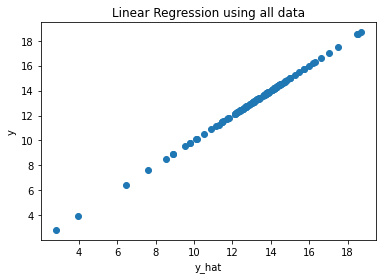

coefficients
0      0.065113
1      0.063075
2     -0.015569
3     -0.056927
4     -0.017351
         ...   
907    0.116048
908   -0.012097
909    0.033070
910   -0.034909
911    0.034224
Length: 912, dtype: float64

intercept
[23.77925616]

r2 score = 1.0


In [71]:
data_x = df_data.iloc[:,:912]
print('X data')
print(data_x.head(5))
data_y = df_data.loc[:,['ERLOTINIB']]
print()
print('Y data')
print(data_y.head(5))

model=LinearRegression()
model.fit(data_x, data_y)
y_hat = model.predict(data_x)
y = data_y

plt.scatter(x=y_hat, y=y)
plt.xlabel('y_hat')
plt.ylabel('y')
plt.title('Linear Regression using all data')
plt.show()

model_coef = pd.Series(model.coef_.reshape(-1))
print('coefficients')
print(model_coef)
print()
print('intercept')
print(model.intercept_)
print()
print('r2 score = {}'.format(r2_score(y_hat,data_y.values)))

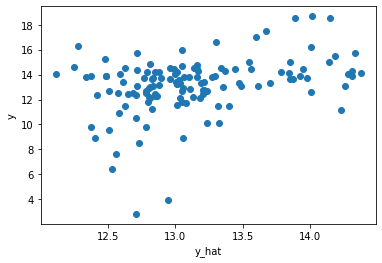

cross validation r2 score = -18.001580329970434


In [72]:
k=5
kf = KFold(n_splits=k, shuffle=False) 

r2_score_list = []
y_hat_list = []
y_true_list = []
model= Lasso()
i=0
for train, test in kf.split(df_data.values):
    i+=1
    train_x = df_data.iloc[train,:912]
    train_y = df_data.iloc[train,-1]
    test_x = df_data.iloc[test,:912]
    test_y = df_data.iloc[test,-1]
    model.fit(train_x, train_y)
    #print('{} times: Coefficients'.format(i))
    #print(model.coef_)    
    y_hat = model.predict(test_x)
    r2 = r2_score(y_hat, test_y.values)
    
    r2_score_list.append(r2)
    y_hat_list += list(y_hat)
    y_true_list += test_y.to_list()

cv_r2_score = np.mean(r2_score_list)
plt.scatter(y_hat_list, y_true_list)
plt.xlabel('y_hat')
plt.ylabel('y')
plt.show()
print('cross validation r2 score = {}'.format(cv_r2_score))

In [73]:
k=5
repeat=10
random_state = 123
kf = RepeatedKFold(n_splits=k, n_repeats=repeat, random_state=random_state)
r2_score_list = []
y_hat_list = []
y_true_list = []
model= LinearRegression()
i=0
for train, test in kf.split(df_data.values):
    i+=1
    train_x = df_data.iloc[train,:912]
    train_y = df_data.iloc[train,-1]
    test_x = df_data.iloc[test,:912]
    test_y = df_data.iloc[test,-1]
    model.fit(train_x, train_y)
    #print('{} times'.format(i))
    #print(model.coef_)
    y_hat = model.predict(test_x)
    r2 = r2_score(y_hat, test_y.values)    
    r2_score_list.append(r2)
    y_hat_list += list(y_hat)
    y_true_list += test_y.to_list()
cv_r2_score = np.mean(r2_score_list)
print()
print('{}-fold cross validation r2 score repeating {} times = {}'.format(k, repeat, cv_r2_score))
print('Total {} * {} fittings, {}'.format(k,repeat,k*repeat))
print('answer',y_hat[0])



5-fold cross validation r2 score repeating 10 times = -1.084579850536865
Total 5 * 10 fittings, 50
answer 12.286427760810357


In [74]:
file = "test_data_x.csv"
df_data2 = pd.read_csv(file,index_col=0)
df_data2

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
NCIH2023_LUNG,5.837943,5.635464,3.64039,5.946965,8.052677,3.385431,4.62293,4.615299,3.893362,8.935931,4.14323,5.963012,2.350497,4.017922,6.317232,5.301953,1.782409,5.716717,2.664483,3.807355,6.332708,1.130931,4.093391,5.400538,6.038919,4.468583,5.705425,3.291309,5.313246,5.449891,6.026136,6.264536,4.086614,6.945678,4.595742,3.64039,3.661065,9.921648,4.221104,5.578939,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14.146


In [75]:
data_x2 = df_data2.iloc[:,:912]
print('X data')
print(data_x2.head(5))
data_y2 = df_data2['ERLOTINIB']
print()
print('Y data')
print(data_y2.head(10))
model=LinearRegression()
model.fit(data_x2, data_y2)
y_hat = model.predict(data_x2)
print(y_hat)

X data
                   RBM5     CDC27   CREBBP  ...  ZNF750_mut  ZNF814_mut  ZNRF3_mut
NCIH2023_LUNG  5.837943  5.635464  3.64039  ...           0           0          0

[1 rows x 912 columns]

Y data
NCIH2023_LUNG    14.146
Name: ERLOTINIB, dtype: float64
[14.146]


In [76]:
k=5
repeat=10
random_state = 123
kf = RepeatedKFold(n_splits=k, n_repeats=repeat, random_state=random_state)

r2_score_list = []
y_hat_list = []
y_true_list = []
model= LinearRegression()
i=0
for train, test in kf.split(df_data.values):
    i+=1
    train_x = df_data.iloc[train,:912]
    train_y = df_data.iloc[train,-1]
    test_x = df_data.iloc[test,:912]
    test_y = df_data.iloc[test,-1]
    model.fit(train_x, train_y)
    #print('{} times'.format(i))
    #print(model.coef_)
    y_hat = model.predict(test_x)
    r2 = r2_score(y_hat, test_y.values)    
    r2_score_list.append(r2)
    y_hat_list += list(y_hat)
    y_true_list += test_y.to_list()
cv_r2_score = np.mean(r2_score_list)

print('answer',y_hat[0])

answer 12.286427760810357


In [77]:
k=5
repeat=10
kf = RepeatedKFold(n_splits=k, n_repeats=repeat)

r2_score_list = []
y_hat_list = []
y_true_list = []
model=LinearRegression()
i=0
for train, test in kf.split(df_data.values):
    i+=1
    train_x = df_data.iloc[train,:452]
    train_y = df_data.iloc[train,-1]
    test_x = df_data.iloc[test,:452]
    test_y = df_data.iloc[test,-1]
    model.fit(train_x, train_y)
    #print('{} times'.format(i))
    #print(model.coef_)
    y_hat = model.predict(test_x)
    r2 = r2_score(y_hat, test_y.values)
    
    r2_score_list.append(r2)
    y_hat_list += list(y_hat)
    y_true_list += test_y.to_list()

cv_r2_score = np.mean(r2_score_list)
print()
print('{}-fold cross validation r2 score repeating {} times = {}'.format(k, repeat, cv_r2_score))
print('Total {} * {} fittings, {}'.format(k,repeat,k*repeat))


5-fold cross validation r2 score repeating 10 times = -0.6820896600343441
Total 5 * 10 fittings, 50


In [78]:
file = "For_FilnalReport.csv"
df_data3 = pd.read_csv(file,index_col=0)
df_data3

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
LC1SQSF_LUNG,5.286142,6.624393,4.061776,5.305971,8.147815,4.422906,5.430954,0.084064,3.460743,8.357596,3.422233,5.675534,2.989139,4.872336,5.839204,5.729553,1.070389,4.265287,3.809414,4.180307,6.215096,1.298658,3.956057,5.010780,5.714520,4.415488,6.265662,4.785027,5.672991,6.796883,6.132782,5.857981,3.580145,7.051590,4.962549,3.305971,4.105175,8.923595,4.665052,5.047015,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,12.743
NCIH1395_LUNG,4.886062,4.581954,3.297191,4.504620,6.460906,4.363872,3.144046,0.678072,2.784504,1.475085,1.028569,4.077243,2.341986,2.954196,4.161081,4.200065,0.310340,5.867402,1.981853,3.044394,5.535120,1.937344,2.173127,3.918386,4.076388,3.713696,4.863443,3.051372,4.350497,5.312883,4.869871,4.925050,3.936402,4.956986,3.944858,3.381283,3.182692,8.489045,4.708739,3.135863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.083
LC1F_LUNG,5.253611,6.014132,4.518535,5.724923,8.394763,4.205549,5.435962,0.014355,3.894333,5.409391,1.220330,5.523876,2.746313,4.709842,5.834661,5.233428,0.565597,5.596935,4.019702,4.202418,6.033423,0.464668,3.976364,5.495375,4.463361,4.645010,5.563463,4.103498,5.726014,5.980939,6.210038,5.723832,3.187451,6.316508,4.533563,4.388190,4.114367,9.325508,4.250962,4.127633,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN
ABC1_LUNG,5.979339,4.698218,4.212569,4.767655,7.682995,4.267536,4.326250,0.070389,3.664483,1.454176,0.176323,5.810186,2.678072,3.701549,5.978882,6.427271,0.014355,7.045596,3.787641,4.227279,4.984589,1.157044,4.232661,4.591560,8.196971,5.079805,5.707911,3.676944,4.956057,5.827819,4.971773,5.771886,5.817623,5.904002,3.647315,5.739848,4.046142,9.499268,4.724650,4.803744,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
LK2_LUNG,5.810957,5.151372,4.660495,6.258707,7.927304,4.107688,5.272770,0.150560,4.119356,2.584963,1.339137,6.127014,2.570463,4.858478,6.003377,5.885818,0.321928,5.303781,3.261531,4.974070,5.976364,3.257011,4.836429,3.570463,3.370164,4.173927,5.863691,3.951401,5.547820,5.704319,5.497932,5.735793,1.232661,6.098664,3.748461,3.866908,3.047887,10.291286,3.548437,4.418865,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,14.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH292_LUNG,6.120186,5.288728,3.469886,5.314697,7.517591,3.848998,4.200850,0.014355,4.077243,1.459432,5.389223,5.469886,2.244887,4.111866,5.219556,6.774524,0.176323,7.442446,3.184280,4.599913,5.850249,2.653060,3.505891,5.218006,6.340028,3.910733,5.447579,3.496974,5.166715,5.596041,4.955127,5.901832,4.047887,6.117695,4.253989,4.488001,3.811471,9.005540,3.565597,5.030336,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
NCIH23_LUNG,5.861955,5.880686,3.857981,6.084702,9.259296,3.994580,4.669594,1.575312,4.084064,10.172803,3.468583,5.736875,2.835924,4.294988,6.413459,6.377124,0.000000,4.180307,3.645010,4.272770,7.365185,1.887525,3.868884,5.022368,6.420550,4.048759,6.109152,3.206331,6.08

In [79]:
df_data3.isnull()
df_remove = df_data3.dropna()
df_data3 = df_remove
df_data3

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
LC1SQSF_LUNG,5.286142,6.624393,4.061776,5.305971,8.147815,4.422906,5.430954,0.084064,3.460743,8.357596,3.422233,5.675534,2.989139,4.872336,5.839204,5.729553,1.070389,4.265287,3.809414,4.180307,6.215096,1.298658,3.956057,5.010780,5.714520,4.415488,6.265662,4.785027,5.672991,6.796883,6.132782,5.857981,3.580145,7.051590,4.962549,3.305971,4.105175,8.923595,4.665052,5.047015,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,12.743
NCIH1395_LUNG,4.886062,4.581954,3.297191,4.504620,6.460906,4.363872,3.144046,0.678072,2.784504,1.475085,1.028569,4.077243,2.341986,2.954196,4.161081,4.200065,0.310340,5.867402,1.981853,3.044394,5.535120,1.937344,2.173127,3.918386,4.076388,3.713696,4.863443,3.051372,4.350497,5.312883,4.869871,4.925050,3.936402,4.956986,3.944858,3.381283,3.182692,8.489045,4.708739,3.135863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.083
LK2_LUNG,5.810957,5.151372,4.660495,6.258707,7.927304,4.107688,5.272770,0.150560,4.119356,2.584963,1.339137,6.127014,2.570463,4.858478,6.003377,5.885818,0.321928,5.303781,3.261531,4.974070,5.976364,3.257011,4.836429,3.570463,3.370164,4.173927,5.863691,3.951401,5.547820,5.704319,5.497932,5.735793,1.232661,6.098664,3.748461,3.866908,3.047887,10.291286,3.548437,4.418865,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,14.995
NCIH446_LUNG,5.717539,5.590063,3.965323,5.957682,8.637893,3.993674,4.674122,7.003152,3.768714,7.264067,3.155425,5.702658,3.310340,5.338781,6.199476,6.763146,0.124328,0.201634,4.159468,4.396434,6.606294,5.475409,4.514753,4.763412,5.143230,5.019702,6.226894,3.839960,5.753818,6.780966,6.342341,5.386811,3.493135,6.452035,0.641546,1.280956,3.021480,10.377644,3.828835,5.558268,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,13.862
LOUNH91_LUNG,6.056367,5.632850,3.979111,5.478648,8.002365,3.797013,5.080658,0.056584,3.746313,10.588340,3.559492,5.893362,2.226509,4.619413,5.591261,6.853122,0.201634,0.495695,3.629939,4.596339,6.035844,4.759688,4.136684,5.129283,5.193772,4.422906,5.828327,3.518535,6.268846,5.093391,5.742545,5.334854,2.358959,6.475085,5.311067,1.014355,4.018812,9.657086,3.659925,4.457463,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH1581_LUNG,6.151575,5.197315,3.563158,6.573647,8.016363,3.536053,4.541019,5.572283,4.146492,11.175362,2.392317,5.426936,2.835924,3.737687,6.076174,5.006298,1.646163,0.310340,3.384050,4.180307,5.624686,4.827311,4.991862,3.744161,2.794936,3.753818,6.140779,3.215679,5.727104,5.655352,5.239551,6.294988,2.715893,5.279843,0.847997,2.301588,2.994580,10.534497,4.580748,4.422906,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.593
RERFLCAD1_LUNG,6.464668,5.465974,4.401221,5.940402,8.182146,4.341274,5.375039,0.137504,4.386121,8.860466,6.077457,5.958843,3.124328,4.228819,6.159468,6.426097,0.042644,7.823240,4.550901,4.458119,5.928133,2.901108,4.748998,5.421560,5.726014,5.093391,

In [91]:
def train_model(model, param_grid=[], X=[], y=[], 
                splits=10, repeats=1):

    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats, random_state=123)
    
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring='r2',
                               verbose=True, return_train_score=True, n_jobs=4)

        gsearch.fit(X,y)
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_
        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring='r2', cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    plt.figure(figsize=(12,4))
    ax_121 = plt.subplot(1,2,1)
    plt.plot(y_pred,y,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    
    #cv_results = cross_val_predict(model, X, y, n_jobs = 4, cv=splits)
    
    ax_122=plt.subplot(1,2,2)
    plt.plot(y_pred,y-y_pred,'.')
    plt.ylim((-4,4))
    plt.xlabel('y_pred')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    plt.show()

    return model, cv_score, grid_results

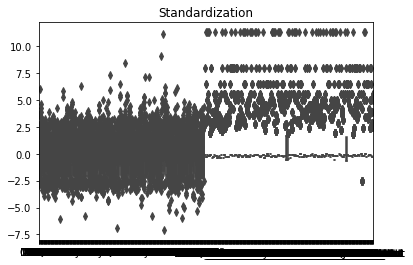

In [96]:
data_x = df_data3.iloc[:,:912]
data_y = df_data3['ERLOTINIB']

scaler = StandardScaler()
scaled_val = scaler.fit_transform(data_x)
scaled_x = pd.DataFrame(scaled_val, columns=data_x.columns)
sns.boxplot(data=scaled_x)
plt.title('Standardization')
plt.show()

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done 1336 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:   18.8s finished


----------------------
Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
----------------------


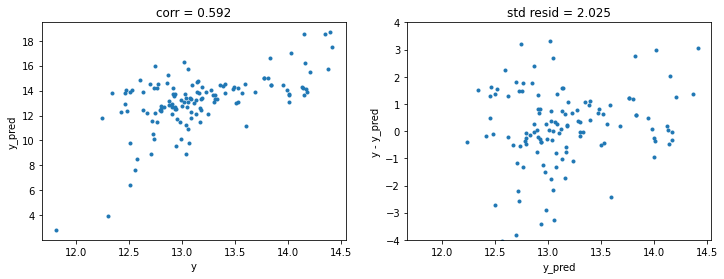

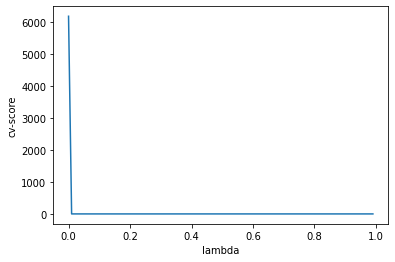


Best Score
mean    0.050123
std     0.076823
dtype: float64

Lambda
0.55


In [102]:
splits = 5
repeats = 3
model=Lasso()
lambda_range = np.arange(0,1,0.01)
param_grid = {
    'alpha': lambda_range
}
best_model,cv_score,grid_results = train_model(model, param_grid=param_grid, splits=splits, repeats=repeats, X=scaled_x, y=data_y)

plt.plot(lambda_range, abs(grid_results['mean_test_score']))
plt.xlabel('lambda')
plt.ylabel('cv-score')
plt.show()
print()
print('Best Score')
print(cv_score)
print()
print('Lambda')
print(best_model.alpha)

In [110]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RepeatedKFold, KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [111]:
file = "test_data_x.csv"
df_data4 = pd.read_csv(file,index_col=0)
df_data4

,RBM5,CDC27,CREBBP,MED24,CSDE1,MAP4K3,BRCA1,HGF,AQR,VIM,FAS,BCLAF1,ARID4A,DEPDC1B,CUL3,TRIO,MSR1,CDH1,INPP4A,MED17,POLR2B,HDAC9,ARID1B,NEDD4L,LIMA1,PIK3CB,THRAP3,ARID4B,CUL1,ZC3H11A,WNK1,CCAR1,PTPRU,NCKAP1,CASP8,ERBB3,MAP2K4,YBX1,PPP2R5A,ASPM,...,TGFBR2_mut,THRAP3_mut,TJP1_mut,TJP2_mut,TNPO1_mut,TNPO2_mut,TOM1_mut,TP53BP1_mut,TP53_mut,TRERF1_mut,TRIO_mut,TRIP10_mut,TSC1_mut,TXNIP_mut,U2AF1_mut,UPF3B_mut,USP6_mut,VHL_mut,VIM_mut,WASF3_mut,WHSC1L1_mut,WHSC1_mut,WIPF1_mut,WNK1_mut,WNT5A_mut,WT1_mut,XPO1_mut,XRN1_mut,YBX1_mut,ZC3H11A_mut,ZFHX3_mut,ZFP36L1_mut,ZFP36L2_mut,ZMYM2_mut,ZNF292_mut,ZNF638_mut,ZNF750_mut,ZNF814_mut,ZNRF3_mut,ERLOTINIB
NCIH2023_LUNG,5.837943,5.635464,3.64039,5.946965,8.052677,3.385431,4.62293,4.615299,3.893362,8.935931,4.14323,5.963012,2.350497,4.017922,6.317232,5.301953,1.782409,5.716717,2.664483,3.807355,6.332708,1.130931,4.093391,5.400538,6.038919,4.468583,5.705425,3.291309,5.313246,5.449891,6.026136,6.264536,4.086614,6.945678,4.595742,3.64039,3.661065,9.921648,4.221104,5.578939,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14.146


In [112]:
def train_model(model, param_grid=[], X=[], y=[], 
                splits=10, repeats=1):

    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats, random_state=123)
    
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring='r2',
                               verbose=True, return_train_score=True, n_jobs=4)

        gsearch.fit(X,y)
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_
        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring='r2', cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    plt.figure(figsize=(12,4))
    ax_121 = plt.subplot(1,2,1)
    plt.plot(y_pred,y,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    
    #cv_results = cross_val_predict(model, X, y, n_jobs = 4, cv=splits)
    
    ax_122=plt.subplot(1,2,2)
    plt.plot(y_pred,y-y_pred,'.')
    plt.ylim((-4,4))
    plt.xlabel('y_pred')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    plt.show()

    return model, cv_score, grid_results

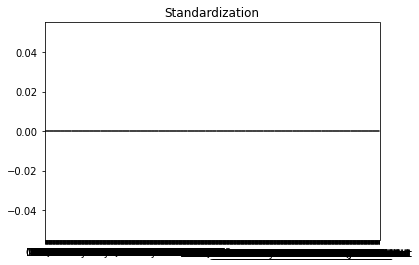

In [113]:
data_x = df_data4.iloc[:,:912]
data_y = df_data4['ERLOTINIB']

scaler = StandardScaler()
scaled_val = scaler.fit_transform(data_x)
scaled_x = pd.DataFrame(scaled_val, columns=data_x.columns)
sns.boxplot(data=scaled_x)
plt.title('Standardization')
plt.show()

In [117]:
guess = best_model.predict(df_data4.iloc[:,:912])
print("answer_Lasso : ",guess[0])

answer_Lasso :  13.936704178947116
